## Análisis exploratorio de la demanda

1-Explorar características de los pacientes.

2-Explorar relaciones entre las características de los pacientes.

3-Explorar consumos. Analizar su distribución

In [1]:
#Importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('.\Data\Dataset_demanda.csv',sep=';')
df.head(2)

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,Q consumos Clinica Medica,Q consumos pediatria,Q consumos nutricionistas,Promedio calificaciones enviadas
0,100000,81,F,69,Titular,a,individuo_tipo_1,SI,2,0,0,"6,5"
1,100001,64,F,77,Titular,b,empresa_tipo_1,SI,1,0,0,8


In [17]:
df.rename(columns={'Q consumos pediatria':'consumos_pediatria', 'Q consumos Clinica Medica':'consumos_clinica','Q consumos nutricionistas':
                  'consumos_nutricionista'},inplace=True)

In [18]:
df.describe()

,id_socio_encoded,edad_encoded,antiguedad_encoded,consumos_clinica,consumos_pediatria,consumos_nutricionista
count,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000
mean,100961.500000,31.917360,29.399688,0.541060,0.322765,0.435551
std,555.555278,20.189223,21.565892,0.673299,0.648436,0.825683
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100480.750000,15.000000,11.000000,0.000000,0.000000,0.000000
50%,100961.500000,31.000000,25.000000,0.000000,0.000000,0.000000
75%,101442.250000,47.000000,44.000000,1.000000,1.000000,1.000000
max,101923.000000,85.000000,130.000000,5.000000,5.000000,7.000000


In [4]:
df.isnull().sum()

id_socio_encoded                    0
edad_encoded                        0
sexo_encoded                        0
antiguedad_encoded                  0
parentesco_encoded                  0
plan_encoded                        0
segmento_encoded                    0
app_descargada_encoded              0
Q consumos Clinica Medica           0
Q consumos pediatria                0
Q consumos nutricionistas           0
Promedio calificaciones enviadas    0
dtype: int64

In [5]:
df[df.id_socio_encoded.duplicated()]

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,Q consumos Clinica Medica,Q consumos pediatria,Q consumos nutricionistas,Promedio calificaciones enviadas


C:\Users\arrua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arrua\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


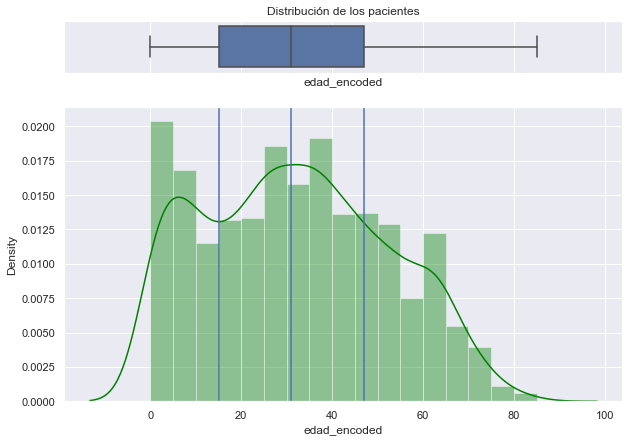

In [6]:
sns.set()

#Se divide el gráfico en dos partes

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,7),gridspec_kw={"height_ratios": (.15, .85)})
 
#Se añade un gráfico a cada parte

sns.boxplot(df.edad_encoded, ax=ax_box)
sns.distplot(df.edad_encoded, ax=ax_hist, kde=False, hist=False)
sns.distplot(df.edad_encoded, ax=ax_hist, kde=True, hist=True,norm_hist=False,color="green")

plt.axvline(df.edad_encoded.quantile(0.25))
plt.axvline(df.edad_encoded.quantile(0.50))
plt.axvline(df.edad_encoded.quantile(0.75))
 
ax_box.set_title("Distribución de los pacientes")
plt.show()


In [7]:
pd.DataFrame(df.edad_encoded.describe())

,edad_encoded
count,1924.000000
mean,31.917360
std,20.189223
min,0.000000
25%,15.000000
50%,31.000000
75%,47.000000
max,85.000000


Aparentemente el grupo mayor de pacientes se localiza entre los 0 y 5 años. Existen pocos pacientes despues de los 70 años.

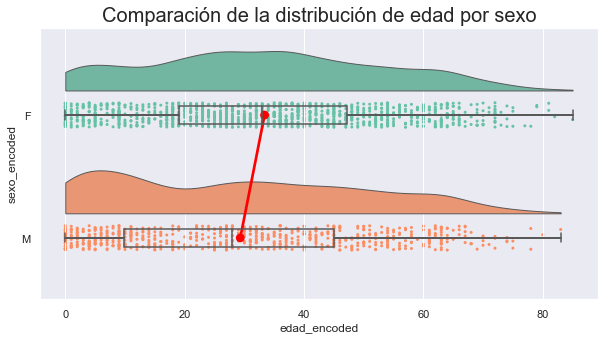

In [8]:
import ptitprince as pt

plt.figure(figsize=(10,5))

ax=pt.RainCloud(x = 'sexo_encoded', y = 'edad_encoded',orient='h', data = df, pointplot = True)

plt.title("Comparación de la distribución de edad por sexo",fontsize=20)

plt.show()

El promedio de edad es mayor para las mujeres que para los hombres.

In [9]:
df.describe()

,id_socio_encoded,edad_encoded,antiguedad_encoded,Q consumos Clinica Medica,Q consumos pediatria,Q consumos nutricionistas
count,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000
mean,100961.500000,31.917360,29.399688,0.541060,0.322765,0.435551
std,555.555278,20.189223,21.565892,0.673299,0.648436,0.825683
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100480.750000,15.000000,11.000000,0.000000,0.000000,0.000000
50%,100961.500000,31.000000,25.000000,0.000000,0.000000,0.000000
75%,101442.250000,47.000000,44.000000,1.000000,1.000000,1.000000
max,101923.000000,85.000000,130.000000,5.000000,5.000000,7.000000


In [10]:
df.head(2)

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,Q consumos Clinica Medica,Q consumos pediatria,Q consumos nutricionistas,Promedio calificaciones enviadas
0,100000,81,F,69,Titular,a,individuo_tipo_1,SI,2,0,0,"6,5"
1,100001,64,F,77,Titular,b,empresa_tipo_1,SI,1,0,0,8


In [90]:
df_clinica=df.loc[df.index.repeat(df.consumos_clinica)].reset_index(drop=True)
df_clinica.consumos_clinica='clinica'

df_pediatria=df.loc[df.index.repeat(df.consumos_pediatria)].reset_index(drop=True)
df_pediatria.consumos_pediatria='pediatria'

df_nutricionista=df.loc[df.index.repeat(df.consumos_nutricionista)].reset_index(drop=True)
df_nutricionista.consumos_nutricionista='nutricionista'

df_nuevo=pd.concat([df_clinica,df_pediatria,df_nutricionista],axis=0).reset_index(drop=True)

In [91]:
df_nuevo.head(3)

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,consumos_clinica,consumos_pediatria,consumos_nutricionista,Promedio calificaciones enviadas
0,100000,81,F,69,Titular,a,individuo_tipo_1,SI,clinica,0,0,"6,5"
1,100000,81,F,69,Titular,a,individuo_tipo_1,SI,clinica,0,0,"6,5"
2,100001,64,F,77,Titular,b,empresa_tipo_1,SI,clinica,0,0,8


In [92]:
df_nuevo['consumos']=df_nuevo.consumos_clinica.astype(str)+df_nuevo.consumos_nutricionista.astype(str)+df_nuevo.consumos_pediatria.astype(str)
df_nuevo.consumos=np.where(df_nuevo.consumos=='clinica00','clinica',df_nuevo.consumos)
df_nuevo.consumos=np.where(df_nuevo.consumos=='clinica10','clinica',df_nuevo.consumos)
df_nuevo.consumos=np.where(df_nuevo.consumos=='pediatria00','pediatria',df_nuevo.consumos)
df_nuevo.consumos=np.where(df_nuevo.consumos=='00pediatria','pediatria',df_nuevo.consumos)
df_nuevo.consumos=np.where(df_nuevo.consumos=='clinica00','nutricionista',df_nuevo.consumos)
df_nuevo.consumos=np.where(df_nuevo.consumos=='0nutricionista0','nutricionista',df_nuevo.consumos)
df_nuevo.consumos=np.where(df_nuevo.consumos=='1nutricionista0','nutricionista',df_nuevo.consumos)

df_nuevo.drop(['consumos_clinica','consumos_pediatria','consumos_nutricionista'],axis=1,inplace=True)

In [93]:
df.consumos_clinica.sum()+df.consumos_pediatria.sum()+df.consumos_nutricionista.sum()

2500

In [94]:
df_nuevo.shape

(2500, 10)

In [95]:
df_nuevo.sort_values(by='id_socio_encoded',inplace=True)
df_nuevo.head()

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,Promedio calificaciones enviadas,consumos
0,100000,81,F,69,Titular,a,individuo_tipo_1,SI,"6,5",clinica
1,100000,81,F,69,Titular,a,individuo_tipo_1,SI,"6,5",clinica
2,100001,64,F,77,Titular,b,empresa_tipo_1,SI,8,clinica
3,100002,60,F,76,Otro,b,empresa_tipo_1,NO,7,clinica
4,100003,49,F,78,Titular,c,empresa_tipo_1,SI,9,clinica


In [102]:
df[(df.consumos_nutricionista>=1) & (df.consumos_clinica>=1)]

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,consumos_clinica,consumos_pediatria,consumos_nutricionista,Promedio calificaciones enviadas
215,100215,29,F,0,Titular,c,individuo_tipo_2,SI,1,0,1,"6,5"
262,100262,35,F,16,Otro,a,individuo_tipo_1,SI,1,0,1,"6,5"
296,100296,36,F,8,Titular,b,individuo_tipo_1,SI,1,0,1,"5,5"
989,100989,40,F,32,Otro,b,empresa_tipo_2,SI,1,0,1,5
1168,101168,23,M,1,Otro,b,empresa_tipo_1,SI,1,0,1,"2,5"


In [103]:
df_nuevo[df_nuevo.id_socio_encoded==100296]

,id_socio_encoded,edad_encoded,sexo_encoded,antiguedad_encoded,parentesco_encoded,plan_encoded,segmento_encoded,app_descargada_encoded,Promedio calificaciones enviadas,consumos
154,100296,36,F,8,Titular,b,individuo_tipo_1,SI,"5,5",clinica
1766,100296,36,F,8,Titular,b,individuo_tipo_1,SI,"5,5",nutricionista


In [96]:
df_nuevo.parentesco_encoded.value_counts()

Titular    1303
Otro       1197
Name: parentesco_encoded, dtype: int64

In [97]:
df_nuevo.plan_encoded.value_counts()

b    1339
a     830
c     331
Name: plan_encoded, dtype: int64

In [98]:
df_nuevo.segmento_encoded.value_counts()

empresa_tipo_1      771
individuo_tipo_1    752
individuo_tipo_2    727
individuo_tipo_3    129
empresa_tipo_2      121
Name: segmento_encoded, dtype: int64

### Consumos Clínica médica

In [99]:
df_nuevo.columns

Index(['id_socio_encoded', 'edad_encoded', 'sexo_encoded',
       'antiguedad_encoded', 'parentesco_encoded', 'plan_encoded',
       'segmento_encoded', 'app_descargada_encoded',
       'Promedio calificaciones enviadas', 'consumos'],
      dtype='object')

In [100]:
df_nuevo.consumos.dtype

dtype('O')

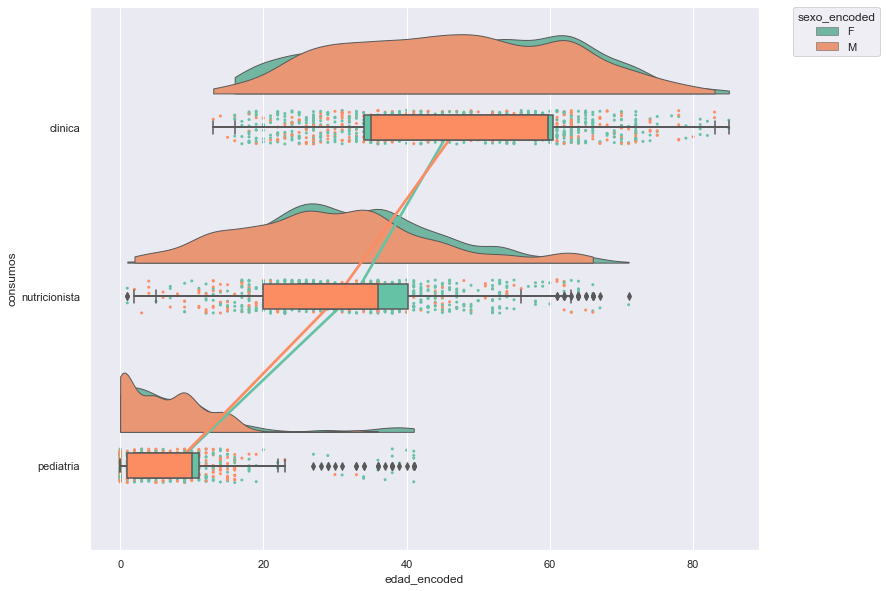

In [106]:
plt.figure(figsize=(12,10))

ax=pt.RainCloud(data=df_nuevo,y='edad_encoded',x='consumos',hue='sexo_encoded',orient='h',pointplot = True)

plt.show()

Hay claramente tres grupos de edad por tipo de consumo.

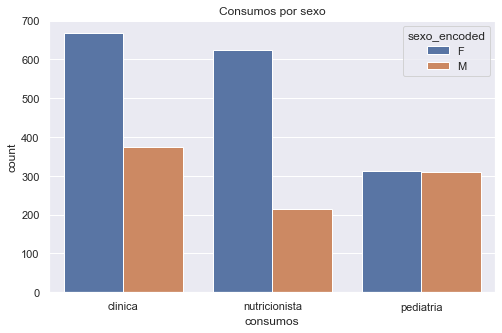

In [111]:
plt.figure(figsize=(8,5))

sns.countplot(data=df_nuevo,x='consumos',hue='sexo_encoded')

plt.title('Consumos por sexo')

plt.show()

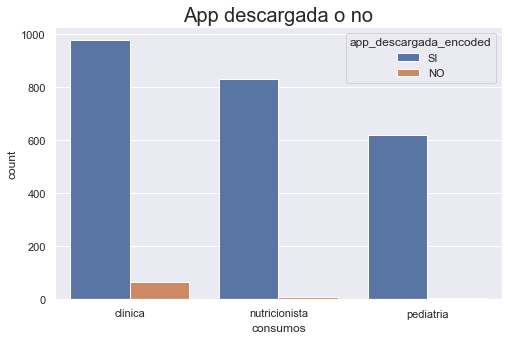

In [113]:
plt.figure(figsize=(8,5))

sns.countplot(data=df_nuevo,x='consumos',hue='app_descargada_encoded')

plt.title('App descargada o no',fontsize=20)

plt.show()

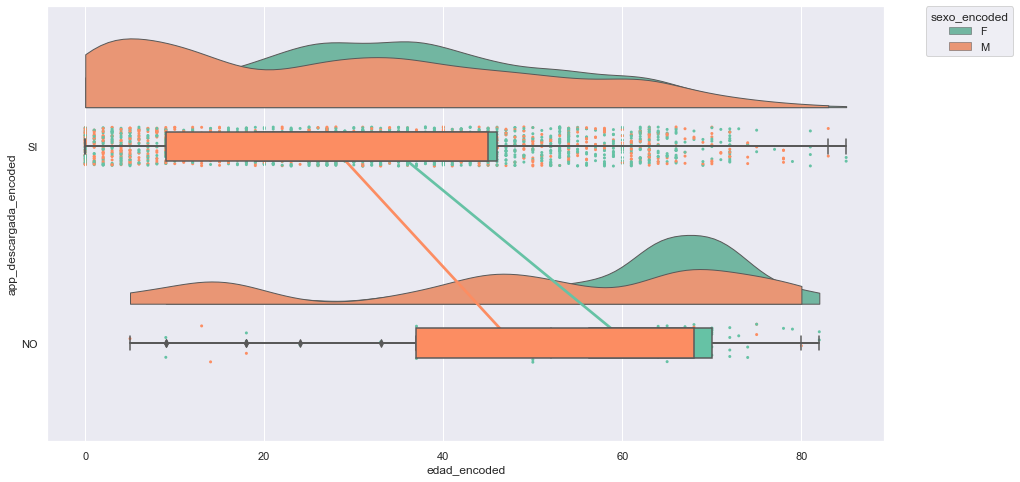

In [116]:
plt.figure(figsize=(15,8))

ax=pt.RainCloud(data=df_nuevo,y='edad_encoded',x='app_descargada_encoded',hue='sexo_encoded',orient='h',pointplot = True)

plt.show()

Claramente la gente de mayor edad no tiene la aplicación descargada.

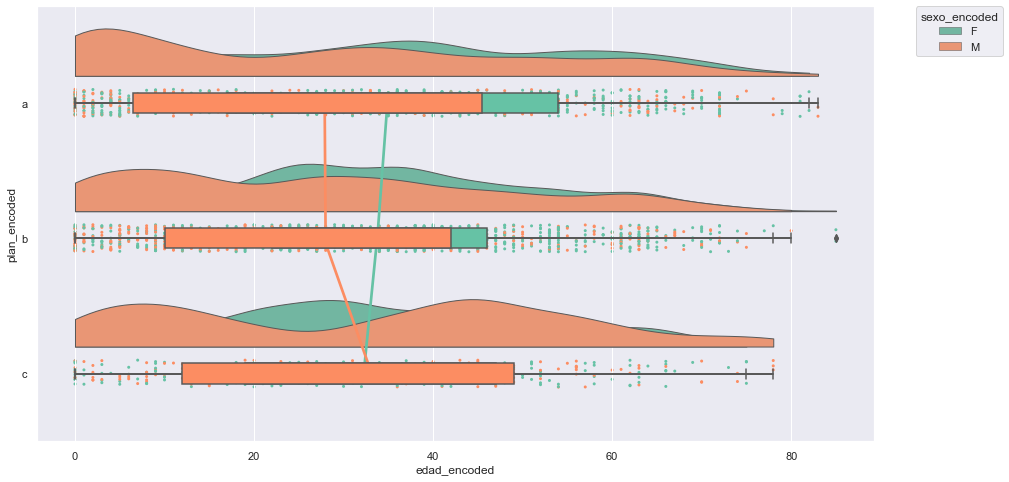

In [118]:
plt.figure(figsize=(15,8))

ax=pt.RainCloud(data=df_nuevo,y='edad_encoded',x='plan_encoded',hue='sexo_encoded',orient='h',pointplot = True)

plt.show()